# Selecting the optimal number of clusters using Silhouette Scores on KMeans and GMM clustering

In this lesson, you have learned to use more advanced clustering algorithms, such as Gaussian Mixture Modeling (GMM) and you have visualized these clusters.  You also learned about using internal indices, such as the **Silhouette Coefficient** to provide scoring of models using unlabeled data.

In the following exercise you will be putting this learning to practice:
1. Import libraries
2. You will create a Gaussian distribution sample dataset 
3. You will create a list of the number of clusterings to test 
4. You will fit the data to models using K-Means and GMM aglorithms
5. You will score the models to find which model and which number of (k) clusters produced optimum results.

At the end of all that you will also be able to visualize your clusters.  For more details on scikit-learn's silhouette_score() and its attributes, [CLICK HERE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score).

#### Please note - for the following code to function as needed and visualization to run, use the variable names as written in the exercises below.

### 1. Import Libraries

In [1]:
# import libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

### 2. Create the Sample Datasest
For this exercise, you will generate a dataset with 2,000 samples (`num_samples = int`), 3 cluster centers (`num_clusters =int`), with cluster standard deviation of 1.5 (`cluster_std = float`). In this exercise, use a random state (`random_state = int`) of 42 to reproduce the results in the solution.  

***We can use scikit-learn's [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs "link to scikit-learn make_blobs documentation") function to create a dataset made up of Gaussian distributions.***

In [3]:
#TO DO - Create the parameters for your sample dataset

num_samples = 2000   ####  #Create the sample dataset size  
num_k_clusters = 3 ####  #Create clusters for the sample dataset
k_cluster_std = 1.5 ####  #Create the standard deviation between clusters
rando_state = 42   ####  #Create the random state for reproducibility


#TODO - Create the sample dataset using make_blobs() - see the link above

X, y = make_blobs(n_samples=num_samples, 
                  centers=num_k_clusters, 
                  cluster_std=k_cluster_std, 
                  random_state= rando_state)

In [4]:
#Check the size of your sample set
print(X.shape, y.shape)

(2000, 2) (2000,)


### 3. Create a list of cluster values (k) to evaluate
Using the variable <code><em>range_k_clusters</em></code>  - create a list of type int, of the number of clusters you will be analyzing, from 2 to 6.

In [5]:
#TO DO
range_k_clusters = [2, 3, 4, 5, 6] #Create list of ints

### 4. Cluster Dataset Using KMeans and GMM
Initialize, fit and predict your K-Means and GMM clustering models by iterating through the list you created above.  Remember to set the random_state in each model to the variable rando_state above.

#### Initialize, fit and predict K-Means clusters for all the k-clusters in range_k_clusters

To review the documentation on scikit-learn's KMeans [CLICK HERE](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)

In [7]:
kmeans_cluster_labels=[]  #This variable will hold the K-Means cluster predictions
kmeans_clusterer_list=[] #This variable will hold values needed to plot cluster centers

# Initialize the clusterer with k_clusters value from range_k_clusters

for k_clusters in range_k_clusters:
    
    #TO DO
    # Initialize KMeans cluster using n_clusters=k_clusters and random_state=rando_state
    kmeans_clusterer = KMeans(n_clusters=k_clusters, random_state=rando_state)
    
    #TO DO
    # Fit dataset (X) to kmeans_clusterer
    kmeans_model = kmeans_clusterer.fit(X)
    
    #TO DO
    # Predict new dataset (X) clusters using the kmeans_model and predict()
    kmeans_prediction = kmeans_model.predict(X)
    
    #Adding predictions to list called kmeans_cluster_labels
    kmeans_cluster_labels.append(kmeans_prediction)  
    
    #Adding values to use to determine cluster centers for plotting
    kmeans_clusterer_list.append(kmeans_clusterer.cluster_centers_)

#### Initialize, fit and predict GMM clustering for all the k-clusters in range_k_clusters

To review the docomentation on scikit-learn's GausssianMixture [CLICK HERE](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html?highlight=gaussian#sklearn.mixture.GaussianMixture)

In [8]:
gmm_cluster_labels=[]  #This variable will hold the GMM cluster predictions
gmm_clusterer_list =[] #This variable will hold values needed to plot cluster centers
gmm_clusterer_gen_list = [] #This variable will hold values needed to plot cluster centers

# Initialize the clusterer with k_clusters value from range_k_clusters

for k_clusters in range_k_clusters:

    #TO DO
    # Initialize Gaussian Mixture Model cluster using n_components=k_clusters and random_state=rando_state
    gmm_clusterer = GaussianMixture(n_components=k_clusters,random_state=rando_state)
    
    #TO DO
    # Fit dataset (X) to gmm_clusterer
    gmm_model = gmm_clusterer.fit(X)
    
    #TO DO
    # Predict new dataset (X) clusters using the gmm_model and predict()
    gmm_prediction = gmm_model.predict(X)
    
    #Add predictions to list
    gmm_cluster_labels.append(gmm_prediction)  
    
    #Add values used to determine center of clusters when plotting
    gmm_clusterer_list.append(np.empty(shape=(gmm_clusterer.n_components, X.shape[1])))
    gmm_clusterer_gen_list.append(gmm_clusterer)

### 5. Create Silhouette Coefficient Scores for your K-Means and GMM Clusters
The following code zips our lists of the number of clusters (`range_k_clusters`) and model predictions (`kmeans_cluster_labels`, `gmm_cluster_labels`).  Then it iterates through the lists to match the dataset (`X`) with a specific model and cluster label (`kmeans_cluster_label`, `gmm_cluster_label`), given the cluster size (`k_clusters`). 

In this section create the silhouette score for kmeans (`silhouette_avg_kmeans`) and GMM (`silhouette_avg_gmm`) using `silhouette_score()`.

To review the documentation on scikit-learn's `silhouette_score()` [CLICK HERE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette#sklearn.metrics.silhouette_score)

In [9]:
# The Silhouette Score gives the average value for all the samples.

for k_clusters, kmeans_cluster_label, gmm_cluster_label in\
    zip(range_k_clusters, kmeans_cluster_labels, gmm_cluster_labels):
    
    #TO DO
    #Create the Silhouette Score for X and the KMeans cluster (kmeans_cluster_label)
    silhouette_avg_kmeans = silhouette_score(X, kmeans_cluster_label)

    #TO DO
    #Create the Silhouette Score for X and the GMM cluster (gmm_cluster_label)
    silhouette_avg_gmm = silhouette_score(X, gmm_cluster_label)
    
    print("For k_clusters =", k_clusters,
          "The avg silhouette_score using K-Means vs GMM is:", silhouette_avg_kmeans, "vs ", silhouette_avg_gmm,
          "\n")

For k_clusters = 2 The avg silhouette_score using K-Means vs GMM is: 0.667709706418 vs  0.667709706418 

For k_clusters = 3 The avg silhouette_score using K-Means vs GMM is: 0.762057144271 vs  0.762057144271 

For k_clusters = 4 The avg silhouette_score using K-Means vs GMM is: 0.591360992574 vs  0.613452352497 

For k_clusters = 5 The avg silhouette_score using K-Means vs GMM is: 0.445181187607 vs  0.451278159128 

For k_clusters = 6 The avg silhouette_score using K-Means vs GMM is: 0.312978424334 vs  0.432441725452 



### 5. The visualizatons below are for the K-Means and GMM clustering that you did above for <code><em>k_clusters</em></code>, where k represents the number of clusters.  The plots also show the center of each cluster, as represented by the red dot.

#### Run to cell below for scatter plot visualizations of the K-Means and GMM clusters calculated above.  No additional inputs needed.

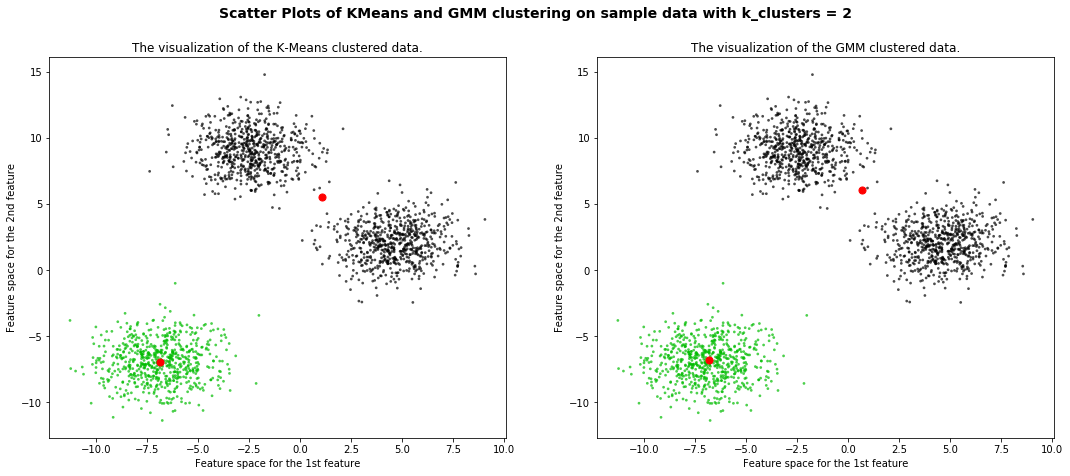

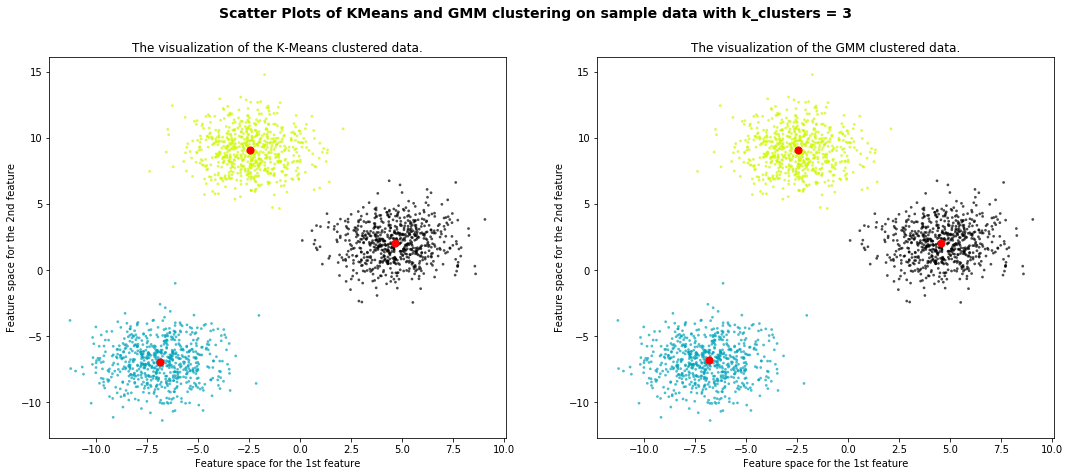

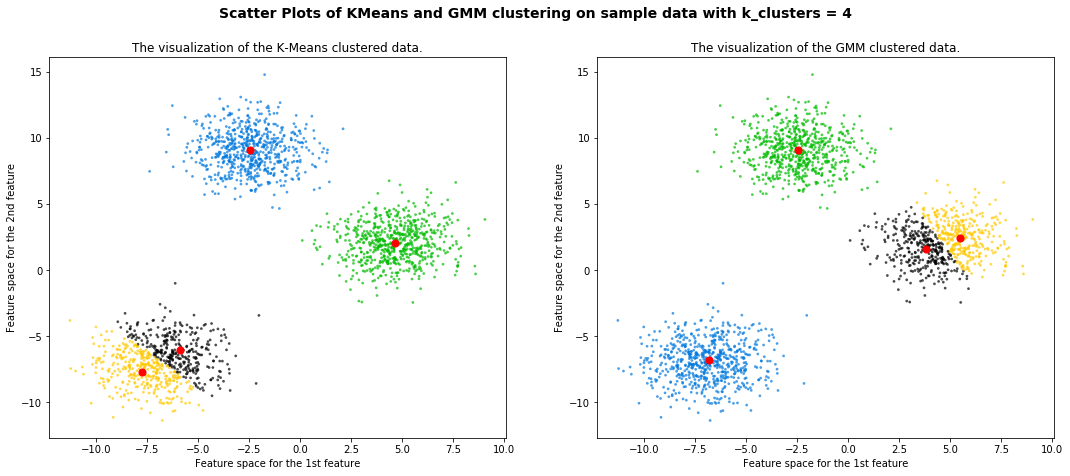

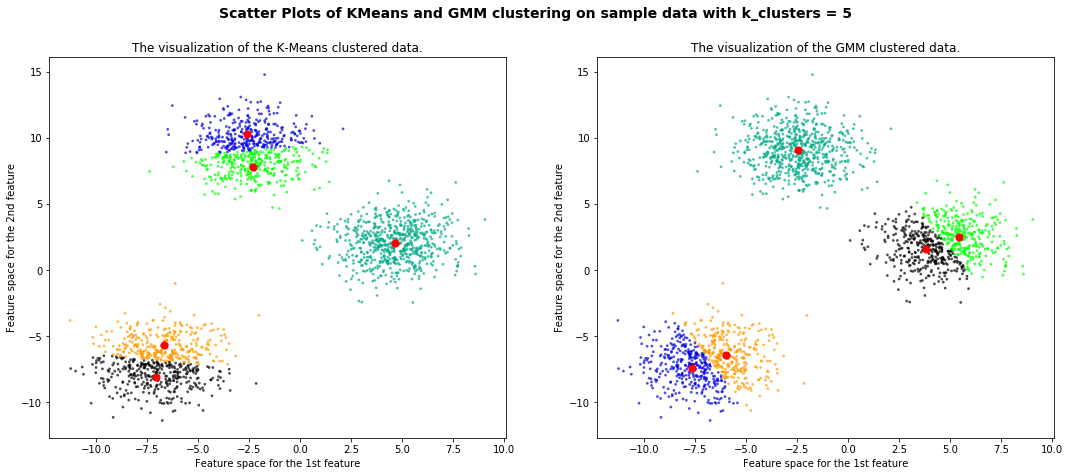

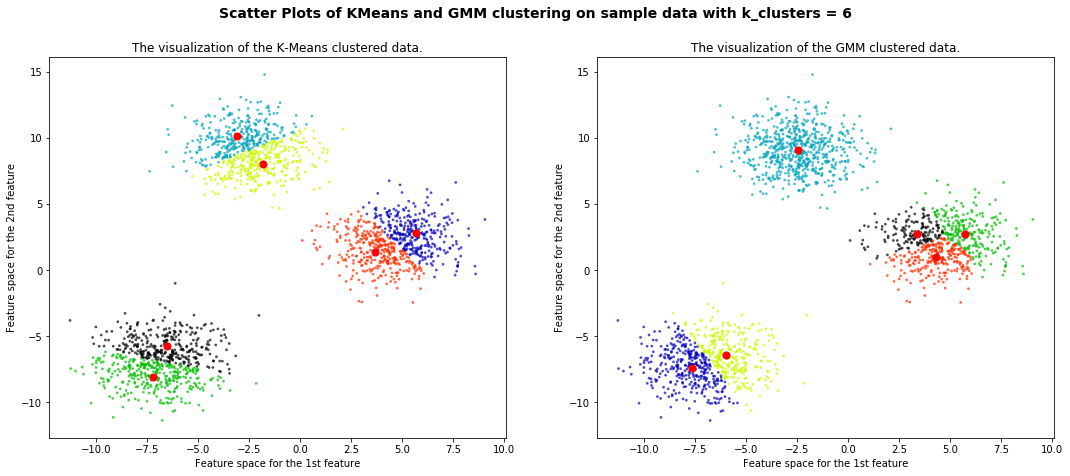

In [10]:
# Visualize and compare KMeans vs GMM Clusters for each value of k_clusters
# Variables centers1 and centers2 are used to plot the centers or each cluster
for k_clusters, kmeans_cluster_label, gmm_cluster_label, centers1, centers2, gmm_cluster in zip(range_k_clusters, kmeans_cluster_labels,gmm_cluster_labels,kmeans_clusterer_list, gmm_clusterer_list,gmm_clusterer_gen_list):

        
    # Plot showing the actual clusters formed
    # Create a subplot with 1 row and 2 features
    fig, [ax2,ax1] = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    
    #Plots for kmeans
    colors = cm.nipy_spectral(kmeans_cluster_label.astype(float) / k_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    for i, c in enumerate(centers1):
        ax2.scatter(c[0], c[1], marker="o", alpha=1, s=50, color='r')

    ax2.set_title("The visualization of the K-Means clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # plots for GMM
    colors = cm.nipy_spectral(gmm_cluster_label.astype(float) / k_clusters)
    ax1.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
        
    # Measure the maximum density in GMM clusters
    for idx, i in enumerate(range(k_clusters)):
        density = scipy.stats.multivariate_normal(cov=gmm_cluster.covariances_[i], 
                                                  mean=gmm_cluster.means_[i]).logpdf(X)
        centers2[i, :] = X[np.argmax(density)]
    ax1.scatter(centers2[:, 0], centers2[:, 1], marker="o", alpha=1, s=50, color='r')
    

    ax1.set_title("The visualization of the GMM clustered data.")
    ax1.set_xlabel("Feature space for the 1st feature")
    ax1.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Scatter Plots of KMeans and GMM clustering on sample data "
                  "with k_clusters = %d" % k_clusters),
                 fontsize=14, fontweight='bold')

plt.show()